In [13]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [14]:
# df = pd.read_csv('csv_results/result_16.csv')
df_ar = pd.read_csv('csv_results_mercury/result_ar.csv')
df_arma = pd.read_csv('csv_results_mercury/result_arma.csv')
df = pd.read_csv('csv_results/result_25.csv')

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').head(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').head(33)
# df = pd.read_csv('csv_results/result_18.csv').sort_values(by='seed').head(33)

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').tail(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').tail(33)
# df = pd.read_csv('csv_results/result_1.csv').sort_values(by='seed').tail(33)
df

,seed,Test,True,ARMA,Order,Informer,Informer_para,Informer_lr
0,35,"[0.8718212183723597, 0.23996180134999567, 0.50...","[0.6515019435710301, 0.5460702465868447, -0.03...","[0.6214405539085733, 0.5388342649455075, -0.03...","(1, 0, 1)","[-0.46392694, -0.037223063, 0.7587228, 0.66231...","(10, 2)",1.000000e-07
1,31,"[0.30341332875453375, 0.6340193617748036, -0.4...","[0.3498758509388278, 0.12847540328511986, 0.56...","[0.332756142833424, 0.12111451648567657, 0.546...","(1, 0, 1)","[0.54690707, 0.22093485, 0.0625899, -0.4151865...","(50, 10)",1.000000e-07
2,8,"[-0.5392376484701498, -0.24463728906733906, 0....","[-0.1981724671640641, -0.4401514148881177, -0....","[-0.19647562053824263, -0.4408738650682562, -0...","(1, 0, 1)","[-0.17208034, -0.24213417, -0.34053412, 0.6571...","(50, 10)",1.000000e-07
3,4,"[0.5410634348616266, 0.5097665400950302, 0.566...","[-0.3949986432210948, 0.738562756472174, 0.140...","[-0.35152308738202226, 0.7600339806821611, 0.0...","(1, 0, 1)","[0.9796151, 0.6328163, 0.20562926, 0.7031978, ...","(10, 2)",1.000000e-07
4,20,"[0.6919287386873479, 0.4648315726744983, -0.14...","[0.0876909677511867, 0.6480832548117545, 0.140...","[0.11861970756509344, 0.6385002132817112, 0.09...","(4, 0, 0)","[0.2865196, 0.9862219, 0.15987849, 0.112115666...","(10, 2)",1.000000e-07
...,...,...,...,...,...,...,...,...
95,6,"[-0.4453356817584949, -0.8090818530260567, -0....","[0.0020627459518735014, -0.44636705473443167, ...","[-0.003520148298033793, -0.4441922500288066, -...","(1, 0, 1)","[-0.8522932, -1.0403132, -0.3096152, -0.536169...","(10, 2)",1.000000e-07
96,93,"[0.30153223106988497, -0.10321544872931196, -0...","[0.45274007283906675, 0.0751621946503516, -0.1...","[0.41597104929910345, 0.11607313740585093, -0....","(1, 0, 1)","[0.30904025, -0.8609126, -0.77901524, 0.007395...","(10, 2)",1.000000e-07
97,95,"[-1.251953775866529, -1.3727370399751577, -1.1...","[-0.7061472957282471, -0.8988801280024054, -0....","[-0.7233899522501364, -0.87473957644421, -0.91...","(1, 0, 1)","[-0.42610756, -1.1204821, -1.0272427, -0.90169...","(50, 10)",1.000000e-07
98,88,"[-0.12535351901394975, 0.08603058028843796, -0...","[-0.777693907859682, 0.2634934349158912, -0.04...","[-0.7822098284740254, 0.26646564732381034, -0....","(1, 0, 1)","[0.298931, -0.20044263, 0.43832588, 0.15686405...","(10, 2)",1.000000e-07


In [15]:
ar_mse = mean_squared_error(np.array(df_ar['Test'].apply(ast.literal_eval).to_list()),np.array(df_ar['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
ar_mse_true = mean_squared_error(np.array(df_ar['True'].apply(ast.literal_eval).to_list()),np.array(df_ar['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse = mean_squared_error(np.array(df_arma['Test'].apply(ast.literal_eval).to_list()),np.array(df_arma['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse_true = mean_squared_error(np.array(df_arma['True'].apply(ast.literal_eval).to_list()),np.array(df_arma['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [16]:
# n_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list())[1],np.array(df['Informer'].apply(ast.literal_eval).to_list())[1],multioutput='raw_values')

# n_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list())[1],np.array(df['Informer'].apply(ast.literal_eval).to_list())[1],multioutput='raw_values')

In [17]:
informer_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# rnn_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

informer_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# rnn_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')


In [18]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_lr_select = np.array(df['Informer_lr'].to_list())
informer_select

array([10, 50, 50, 10, 10, 10, 10, 10, 10, 10, 10, 50, 20, 10, 10, 10, 10,
       10, 20, 50, 10, 50, 10, 50, 10, 10, 10, 10, 10, 50, 10, 50, 10, 50,
       50, 10, 50, 50, 10, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 10,
       20, 10, 10, 10, 10, 10, 10, 50, 10, 50, 50, 10, 10, 10, 10, 50, 10,
       20, 20, 10, 10, 10, 10, 10, 10, 10, 50, 10, 50, 10, 10, 10, 10, 10,
       10, 20, 20, 50, 10, 10, 50, 20, 50, 10, 10, 10, 50, 10, 20])

In [19]:
informer_lr_select

array([1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
       1.e-07, 1.e-07, 1.e-07, 1.e-07])

In [20]:
print(float(informer_lr_select[0]))

1e-07


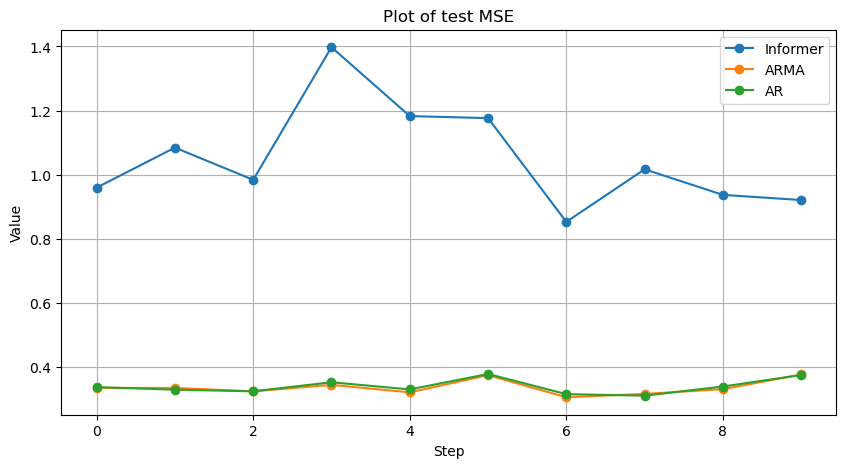

In [21]:


# Plotting the array
plt.figure(figsize=(10, 5))
# plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.plot(ar_mse,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of test MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


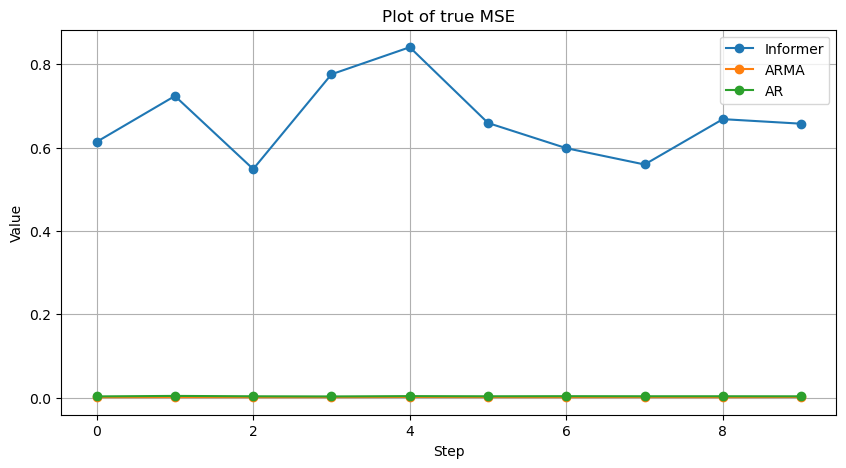

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
# plt.plot(rnn_mse_true,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse_true,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.plot(ar_mse_true,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


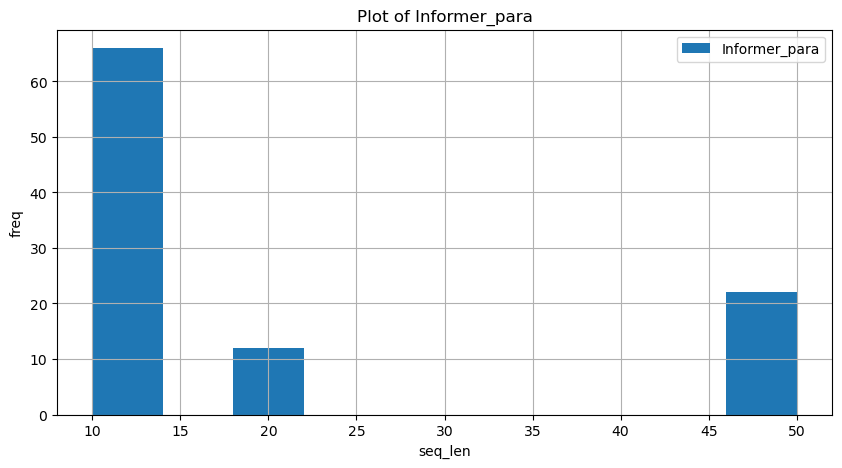

In [23]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of Informer_para')
plt.xlabel('seq_len')
plt.ylabel('freq')
plt.grid(True)
plt.legend()
plt.show()

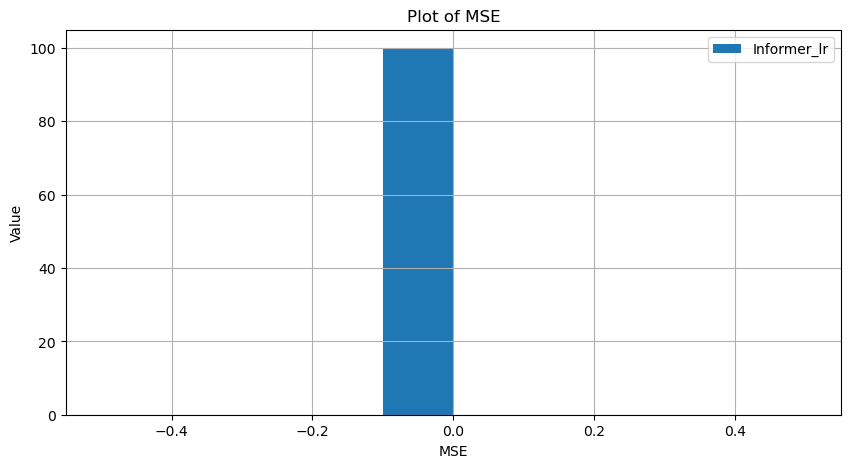

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(informer_lr_select,label = 'Informer_lr')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()